# <center> Analysis of STD Infection Rates in US: 1996-2011</center>
## <center> by Jordan </center>

# Investigation Overiew
> The analyses will give us idea about various trends of STDs in US from 1996 to 2011 inrealtion with State, Gender, age, year, STD cases and rate.

# Dataset Overview
**The dataset is taken from https://wonder.cdc.gov. It focuses on STD Infection Rate in United States 1996-2011. The Rate is calculated per 100,000. It contains Chlamydia, Gonorrhea, Syphilis STD diseases. As per the website there are no records for New York from 1996 to 1999. The citation is as follows:**                           
>US Department of Health and Human Services, Centers for Disease Control and Prevention, National Center for HIV, STD and TB Prevention (NCHSTP), Division of STD/HIV Prevention, Sexually Transmitted Disease Morbidity for selected STDs by age, race/ethnicity and gender 1996-2011 Archive, CDC WONDER Online Database.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import FuncFormatter as ff

%matplotlib inline
sb.set_style('darkgrid')
#sb.set_palettet(sb.color_palette()[0])

In [2]:
import plotly.express as px

In [3]:
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [2]:
df = pd.read_csv('STDs by Age,Year,State and Gender, 1996-2011 Archive.csv')
df.head()

,Disease,Disease Code,State,State Code,Year,Year Code,Gender,Gender Code,Age,Age Code,STD Cases,Population,Rate
0,Chlamydia,274,Alabama,1,1996,1996,Female,F,0-14 years,0-14,126,446376,28.23
1,Chlamydia,274,Alabama,1,1996,1996,Female,F,15-19 years,15-19,1802,160943,1119.65
2,Chlamydia,274,Alabama,1,1996,1996,Female,F,20-24 years,20-24,1405,156405,898.31
3,Chlamydia,274,Alabama,1,1996,1996,Female,F,25-29 years,25-29,405,156680,258.49
4,Chlamydia,274,Alabama,1,1996,1996,Female,F,30-34 years,30-34,144,161922,88.93


In [6]:
df.shape

(27053, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27053 entries, 0 to 27052
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Disease       27053 non-null  object 
 1   Disease Code  27053 non-null  int64  
 2   State         27053 non-null  object 
 3   State Code    27053 non-null  int64  
 4   Year          27053 non-null  int64  
 5   Year Code     27053 non-null  int64  
 6   Gender        27053 non-null  object 
 7   Gender Code   27053 non-null  object 
 8   Age           27053 non-null  object 
 9   Age Code      27053 non-null  object 
 10  STD Cases     27053 non-null  int64  
 11  Population    27053 non-null  int64  
 12  Rate          27053 non-null  float64
dtypes: float64(1), int64(6), object(6)
memory usage: 2.7+ MB


# Data Cleaning

In [3]:
# replace spaces with underscores and lowercase labels for 2008 dataset
df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"),
             inplace=True)
df.head()

,disease,disease_code,state,state_code,year,year_code,gender,gender_code,age,age_code,std_cases,population,rate
0,Chlamydia,274,Alabama,1,1996,1996,Female,F,0-14 years,0-14,126,446376,28.23
1,Chlamydia,274,Alabama,1,1996,1996,Female,F,15-19 years,15-19,1802,160943,1119.65
2,Chlamydia,274,Alabama,1,1996,1996,Female,F,20-24 years,20-24,1405,156405,898.31
3,Chlamydia,274,Alabama,1,1996,1996,Female,F,25-29 years,25-29,405,156680,258.49
4,Chlamydia,274,Alabama,1,1996,1996,Female,F,30-34 years,30-34,144,161922,88.93


In [9]:
df.duplicated().sum()

0

In [10]:
df.isna().sum()

disease         0
disease_code    0
state           0
state_code      0
year            0
year_code       0
gender          0
gender_code     0
age             0
age_code        0
std_cases       0
population      0
rate            0
dtype: int64

In [ ]:
def fix_name():

# What is the structure of your dataset?
> The dataset is pretty clean containing **27053 records with 13 columns**.The columns are as follows                                                                                
**['Disease', 'Disease Code', 'State', 'State Code', 'Year', 'Year Code',
       'Gender', 'Gender Code', 'Age', 'Age Code', 'STD Cases', 'Population',
       'Rate']**

# What are the main features of interest in your dataset?
> • STD Cases                                                                              
> • Rate                                                       
> • Year                                                                
> • Disease                                                                    
> • State                                                                             
> • Gender                                                                       

# What features in the dataset do you think will help support your investigation into your features of interest?
> • Disease                                                                                                                    
• STD Cases                                                                    
• Rate                                                                                             
• Year                                                                                

# Univariate Plots

## What is the trend of STDs in the States ?

In [51]:
state_cases = df.groupby('state').sum().sort_values(by='std_cases',ascending=False)
state_cases = state_cases.reset_index()
state_cases.head(10)

,state,disease_code,state_code,year,year_code,std_cases,population,rate
0,Texas,185476,31008,1294254,1294254,1495910,1005846754,172034.69
1,California,183306,3834,1280239,1280239,1461879,1566844466,107672.69
2,Florida,183616,7680,1282240,1282240,946306,770167984,165967.15
3,Illinois,182996,10846,1278233,1278233,912044,562572144,197310.90
4,North Carolina,182996,23606,1278216,1278216,700211,382160611,226739.57
5,New York,175282,22068,1228191,1228191,641854,785144438,95128.28
6,Ohio,179586,24453,1256201,1256201,553881,506009309,137035.42
7,Pennsylvania,175866,25830,1232172,1232172,514592,544682798,119694.67
8,Georgia,183926,8333,1284240,1284240,503214,392677071,150135.03
9,Michigan,179896,16328,1258150,1258150,447758,441731864,125250.18


In [74]:
Louisiana = df[df['state']=='Louisiana']
Louisiana.std_cases.sum()

415194

In [75]:
Texas = df[df['state']=='Texas']
Texas.std_cases.sum()

1495910

In [ ]:
# function to format ticks with 1e6 offset
def millions(tick_val,pos):
    return '%1.1fM' % (tick_val*1e-6)

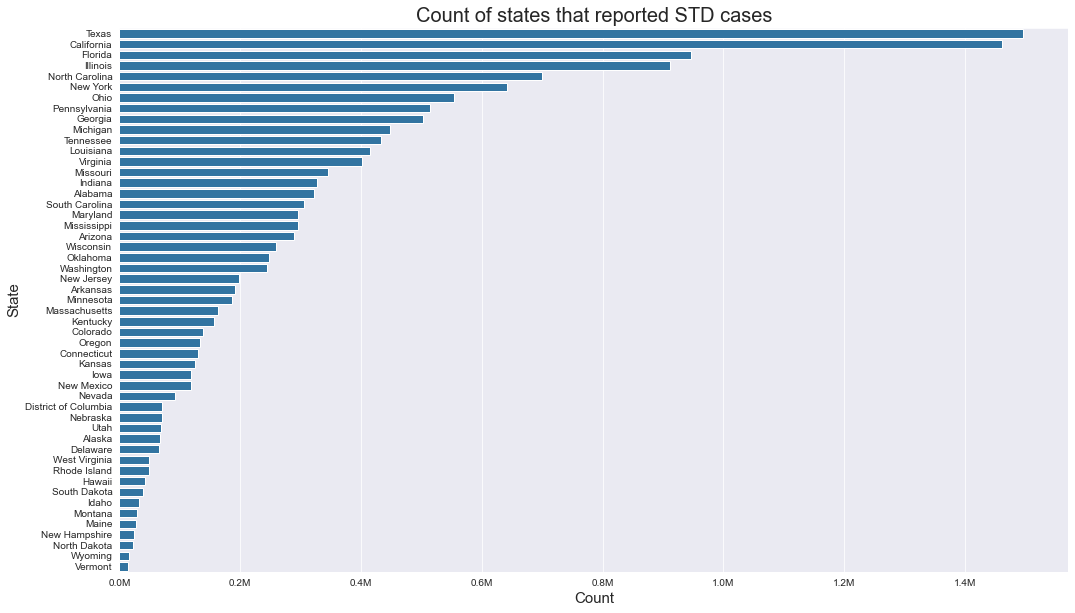

In [119]:
formatter = ff(millions)

#plotting
fig, ax = plt.subplots(figsize=(17,10));
ax.xaxis.set_major_formatter(formatter)
sb.barplot(x=state_cases['std_cases'], y=state_cases['state'],color=sb.color_palette()[0])

#polishing the plot
plt.title('Count of states that reported STD cases',fontsize=20);
plt.yticks(fontsize=10)
plt.xticks(fontsize=10)
plt.xlabel('Count',fontsize=15)
plt.ylabel('State',fontsize=15);

# From the above visualization we can see that:
> • Texas and California have the highest reported STD cases                                         
> • Vermont and Wyoming are the states with less number of reported STD cases 

# How STD rates are distributed over the dataset ?

In [13]:
df['rate'].describe()

count    27053.000000
mean       260.536064
std        528.756490
min          0.090000
25%          8.770000
50%         56.210000
75%        255.840000
max       6982.070000
Name: rate, dtype: float64

In [14]:
np.log10(df['rate'].describe())

count    4.432215
mean     2.415868
std      2.723256
min     -1.045757
25%      0.943000
50%      1.749814
75%      2.407968
max      3.843984
Name: rate, dtype: float64

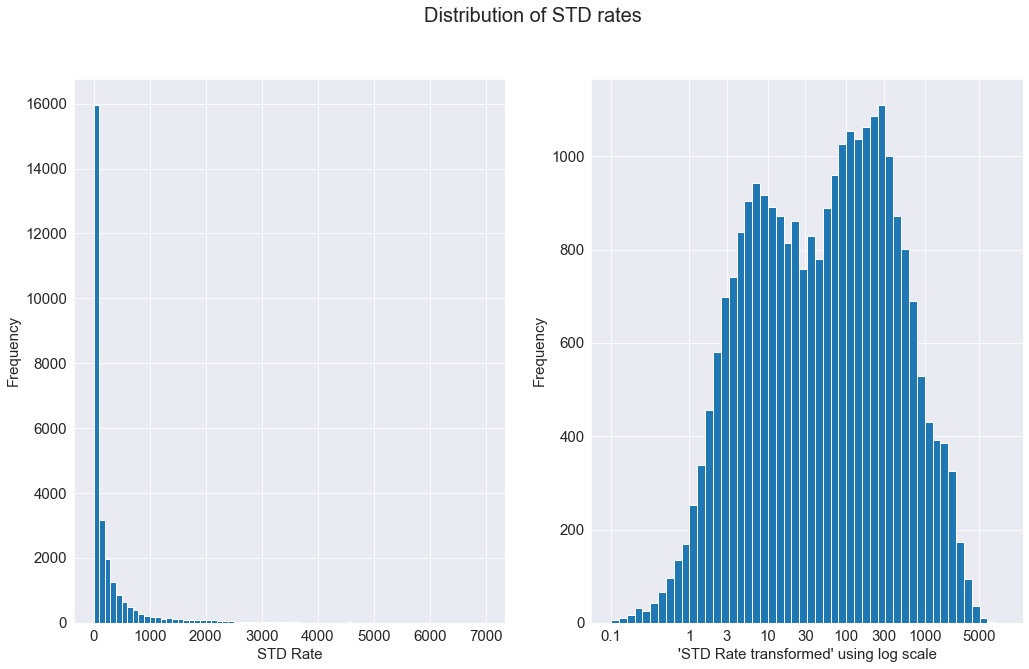

In [100]:
plt.figure(figsize=(17,10))
plt.suptitle('Distribution of STD rates',fontsize=20)

#left histogram: data plotted in natural points
plt.subplot(1,2,1)
bins = np.arange(0,df['rate'].max() + 100,100)
plt.hist(data=df,x='rate',bins=bins)
plt.xlabel('STD Rate',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15);


#right histogram: data plotted after log transformation
plt.subplot(1,2,2)
bins = 10 ** np.arange(-1,4 + 0.1,0.1)
ticks = [0.1, 1, 3, 10, 30, 100, 300, 1000,5000]
plt.hist(df['rate'],bins=bins)
plt.xscale('log')
plt.xticks(ticks,ticks,fontsize=15)
plt.xlabel("'STD Rate transformed' using log scale",fontsize=15);
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15);

# From the above histograms,
### Historgram on Left:
> • The majority of data points with value above 500 mash the majority of the points into the bins on the far left.       
> • This indicates axis transformation is needed to visualize the distribution of std rates.

### Histogram on Right:
> • **The logarithmic scale transformation** shows that the data is roughly bimodal, with first peak somewhere between 3 and 10, and second peak around 100, finally the largest peak around 300. The rate distribution cuts off at its maximum, rather than declining in a smooth tail. 

# Bivariate Plots

## Which states have the highest number of STD cases ?

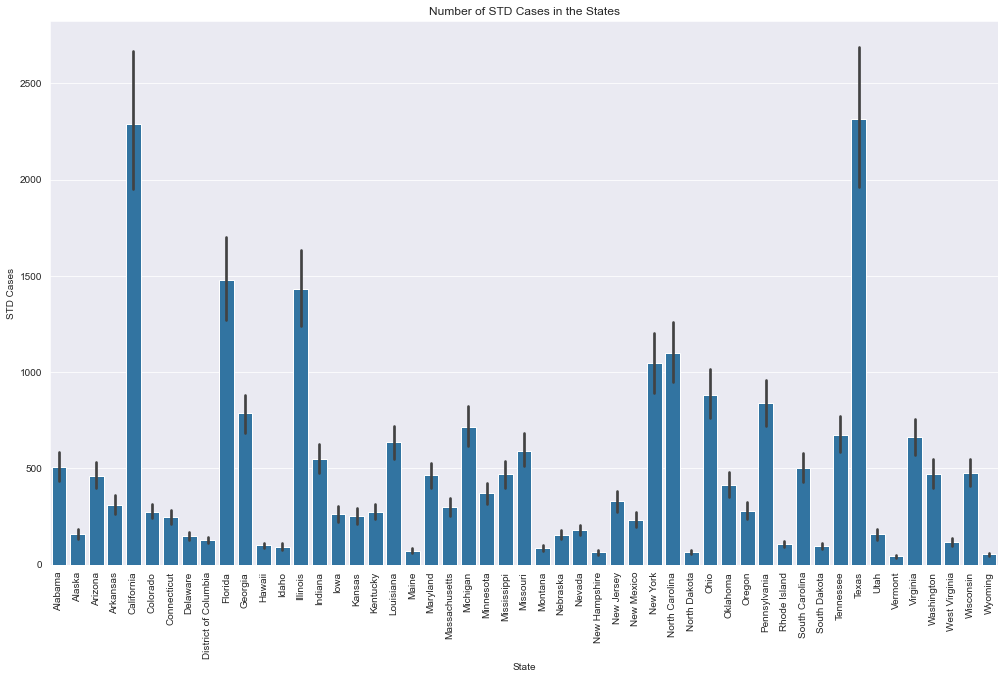

In [18]:
plt.figure(figsize=(17,10))
sb.barplot(data=df, x='state',y='std_cases',color=sb.color_palette()[0])
plt.title('Number of STD Cases in the States')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('STD Cases');

## From the above barchart, we can see that:
> • Texas and California have the highest number of STD Cases                                                   
• Vermont and Wypoming have the lowest number of STD Cases

# How rates vary by States ?

In [19]:
df['rate'].describe()

count    27053.000000
mean       260.536064
std        528.756490
min          0.090000
25%          8.770000
50%         56.210000
75%        255.840000
max       6982.070000
Name: rate, dtype: float64

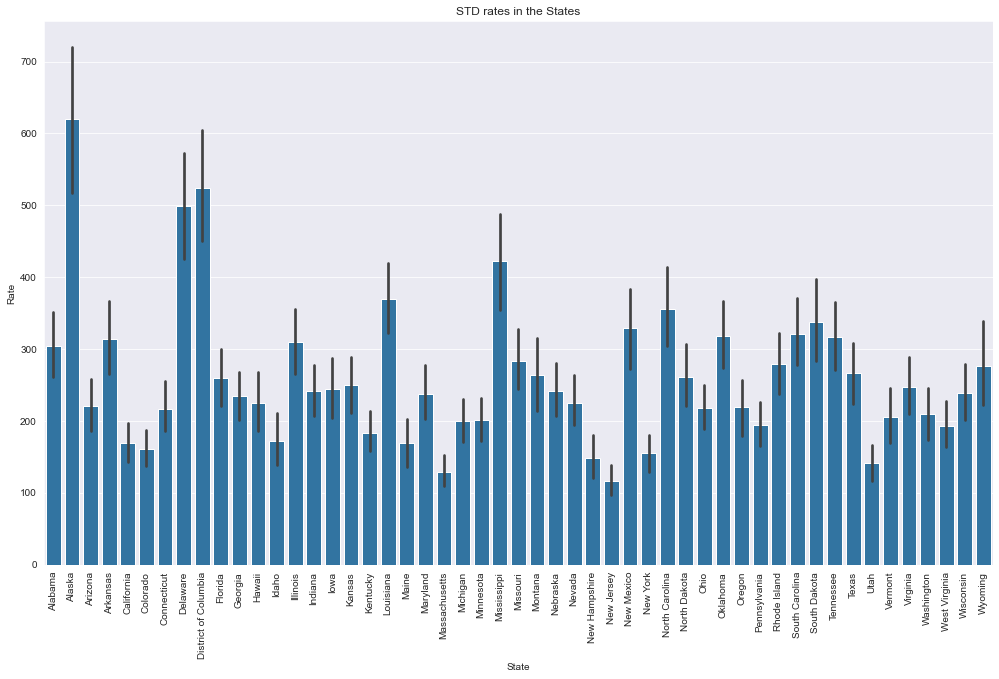

In [20]:
plt.figure(figsize=(17,10))
sb.barplot(data=df, x='state',y='rate',color=sb.color_palette()[0])
plt.title('STD rates in the States')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.ylabel('Rate');

## From the above visualization, one can observe that:
> • Alaska and DC recorded higher growth for STD cases in comparison to other states                                    
> • While New Jersey had the least growth by the end of 2011

# Which gender suffers more from STDs ?

In [120]:
gender_cases = df.groupby('gender').sum().sort_values(by='std_cases',ascending=False)
gender_cases = gender_cases.reset_index()
gender_cases

,gender,disease_code,state_code,year,year_code,std_cases,population,rate
0,Female,3719484,373027,26391116,26391116,10074316,6107702203,4943687.99
1,Male,3945482,393677,27810506,27810506,4727735,6097665211,2104594.14


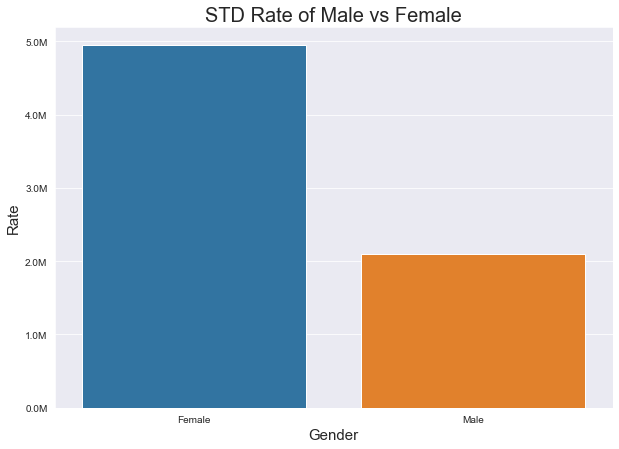

In [116]:
formatter = ff(millions)

#plotting
fig, ax = plt.subplots(figsize=(10,7));
sb.barplot(data=gender_cases, x='gender',y='rate');

#polishing the plot
ax.yaxis.set_major_formatter(formatter)
plt.title('STD Rate of Male vs Female',fontsize=20)
plt.xlabel('Gender',fontsize=15)
plt.ylabel('Rate',fontsize=15);

## From above chart,
> • It is evident to say that Females suffer more from STDs than Males

# Mutlivariate Plots

***Based on the bivariate plots it looks like there is something wrong with rate column.One of the ways is to use standard deviation of the rate column. Lets, recalculate rate and make a new data frame using groupby() with name: 'actual_rate1'***

# What is the overall trend of STDs from 1996-2011 ?

In [88]:
actual_rate1= df.groupby(['year','disease']).std()
actual_rate1.dropna(inplace=True)


In [89]:
actual_rate1 = actual_rate1.reset_index()
actual_rate1

,year,disease,disease_code,state_code,year_code,std_cases,population,rate
0,1996,Chlamydia,0.0,15.543452,0.0,1173.871022,595429.537619,460.265207
1,1996,Gonorrhea,0.0,15.703611,0.0,562.335722,642293.733268,282.147477
2,1996,Primary and Secondary Syphilis,0.0,15.362291,0.0,27.162114,736912.067624,13.550793
3,1997,Chlamydia,0.0,15.559562,0.0,1258.874722,607545.997864,465.591104
4,1997,Gonorrhea,0.0,15.570287,0.0,556.349434,651066.909222,273.704937
5,1997,Primary and Secondary Syphilis,0.0,15.333483,0.0,23.188749,768987.310957,10.610993
6,1998,Chlamydia,0.0,15.656036,0.0,1418.409943,615165.127097,553.902357
7,1998,Gonorrhea,0.0,15.610511,0.0,649.619680,666970.643992,294.138330
8,1998,Primary and Secondary Syphilis,0.0,15.582441,0.0,19.153213,802754.132318,7.832609
9,1999,Chlamydia,0.0,15.661859,0.0,1614.579090,630425.212493,592.324453


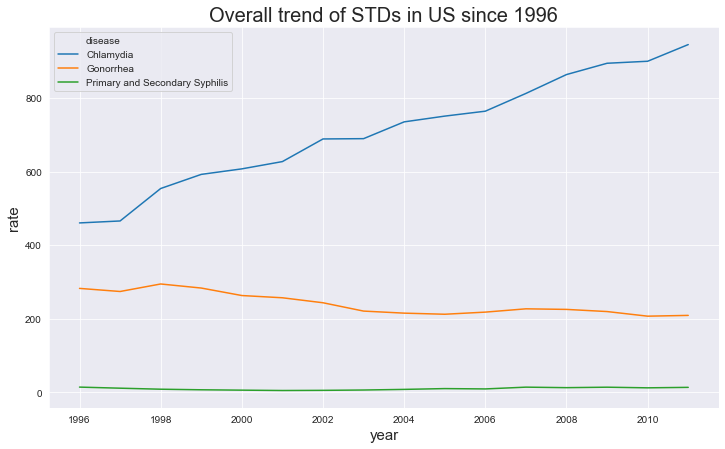

In [96]:
plt.figure(figsize=(12,7))
sb.lineplot(x='year',y='rate',hue='disease',data=actual_rate1);
plt.title('Overall trend of STDs in US since 1996',fontsize=20);
plt.xlabel('year',fontsize=15)
plt.ylabel('rate',fontsize=15);

In [24]:
fig = px.line(actual_rate1, x='year', y='rate',color='disease')
fig.update_layout(
    title = "Overall trend of STDs in US since 1996"
)

fig.show()


## Based on the above visualization, we conclude that
> • Overall, Chlamydia show a constant increase reaching a peak of over 900                                                   
• Gonorrhea reported a steady decrese by the end of 2010                                                        
• On the other hand, Syphilis had a steady trend over the period of time.

# How is the widespread of STDs over different age groups ?

In [30]:
age_STDs = df.groupby(['age','disease']).sum().sort_values(by='rate',ascending=False)
age_STDs = age_STDs.reset_index()

In [31]:
age_STDs

,age,disease,disease_code,state_code,year,year_code,std_cases,population,rate
0,20-24 years,Chlamydia,446072,47224,3261726,3261726,3887301,319568938,2004283.59
1,15-19 years,Chlamydia,446072,47224,3261726,3261726,3761620,328192527,1909456.29
2,25-29 years,Chlamydia,446072,47224,3261726,3261726,1517394,319311407,779096.70
3,20-24 years,Gonorrhea,456680,47208,3267701,3267701,1351802,322240342,637640.63
4,15-19 years,Gonorrhea,452200,46503,3235642,3235642,1170032,330795319,552395.64
5,25-29 years,Gonorrhea,448560,46074,3209716,3209716,685766,321463972,323696.17
6,30-34 years,Chlamydia,445798,47168,3259729,3259729,603162,323794027,306822.56
7,30-34 years,Gonorrhea,429800,43612,3075488,3075488,364974,324519634,171510.64
8,35-39 years,Chlamydia,445250,47113,3255737,3255737,276305,342115772,130705.78
9,35-39 years,Gonorrhea,417200,41901,2985255,2985255,233942,341548983,104521.58


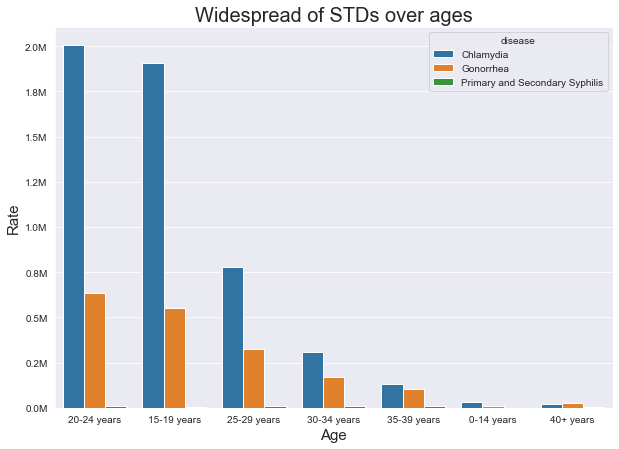

In [117]:
formatter = ff(millions)

# tick formatter
fig, ax = plt.subplots(figsize=(10,7));
ax.yaxis.set_major_formatter(formatter)

# plotting
sb.barplot(data = age_STDs, x='age',y='rate',hue='disease');

# polishing the plot
plt.title('Widespread of STDs over ages',fontsize=20)
plt.xlabel('Age',fontsize=15)
plt.xticks(fontsize=10)
plt.ylabel('Rate',fontsize=15)
plt.yticks(fontsize=10);

In [25]:
fig = px.histogram(df, x='age', y='rate',color='disease')
fig.update_layout(
    title = "Widespread of STDs over ages"
)

fig.show()


## Results from above histogram are
> •STD was rampant in Teenage years                                                                 
• Among STDs, Chlamydia was more prevalent in most age groups while Syphilis was the least                               

### Of the features you investigated, were there any unusual distributions ? Did you perform any operations/transformations? If so, why did you do this?
> • During the visualization of STD rate, the histogram generated was too much skewed to the left.                    
> • This was corrected using log scale transformation which gave a clear idea on the distribution of the STD rates

### Were there any surprising interactions between features ?
> • In the bivariate plot of STD rate vs State, the rate showed out of ordinary behaviour. The attempt was made to fix rate column in multivariate plots that made sense when combined with features

## Conclusion
From the visualizations above derivations made are:
> • Texas has maximal number of STD Cases                                                                     
• Texas and California reported the largest rise in STDs                                                             
• Overall, Chlamydia has increased over the years                                                   
• The first drop for Gonorrhea was in year 2001                                                         
• The rates across the ages is unimodal with age 20-24 years having the highest rate of STDs                         
• From multivariate plots, it can be derived that Chlamdydia was more common among STDs                             
• States with low STD cases like Vermont and Wyoming also have least rate. This proves there is a propotional relation between STD cases and rate. But in case of the states with highest STD Cases this relationship does not follow. Thus, further analysis is required.

# Resources used:
• https://plotly.com/python/plotly-express/                                                          
• https://stackoverflow.com/questions/39136652/plotly-graph-does-not-show-when-jupyter-notebook-is-converted-to-slides     
• https://matplotlib.org/examples/pylab_examples/custom_ticker1.html

# Thank you,Udacity!